### Задание 5

#### Функция для нахождения равномерно распределенных случайных величин

In [1]:
def Uniform_dist(N, a = 16, c = 7, m = 225, x_0 = 2):

    list_U = [] # список равномерно распределенных случайных величин
    x_n = x_0
    for i in range(N):
        x_n = (a * x_n + c) % m
        list_U.append(x_n / m)
    return list_U

In [2]:
def Discrete_dist(N):
    P = 0.2    
    X = [] # список сгенерированных случайных величин
    for U in Uniform_dist(N):
        p = P
        x = 1
        while U > p:
            p += P
            x += 1
        X.append(x)
    return X

In [3]:
discrete = Discrete_dist(5500)

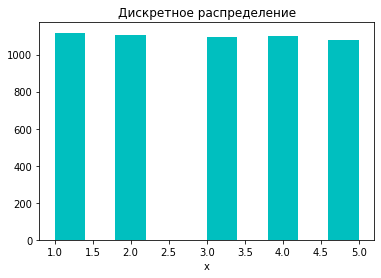

In [5]:
import matplotlib.pyplot as plt

plt.hist(discrete, color = 'c')
plt.xlabel('x')
plt.title('Дискретное распределение')
plt.show()

### Задание 9

Плотность распределения Коши:

$\begin{array}\mathcal{ f}\left(x\right)&=&\displaystyle \frac{1}{\pi (1 + x^{2})} \end{array}$

Функция распределения Коши:

$\begin{array}\mathcal{ F}\left(x\right)&=&\displaystyle \int \limits _{-\infty }^{x}\ \frac{1}{\pi (1 + x^{2})} { dx}&=&\displaystyle  \frac{1}{\pi}{arctg(x)} \Big |_{-\infty }^{x}&=& \displaystyle\frac{1}{2} + \frac{1}{\pi}{arctg(x)} \end{array}$

Обратная функция распределения Коши для генерирования случайных величин:

$\begin{array}\mathcal{ F^{-1}}\left(x\right)&=&\displaystyle {tg(\pi(x - \frac{1}{2}))} \end{array}$


In [6]:
import math

def Cauchy_dist(N):
    X = []
    for i in Uniform_dist(N):
        X.append(math.tan(math.pi * (i - 1/2)))
    return X

In [7]:
cauchy = Cauchy_dist(100)

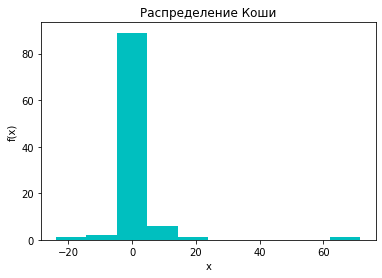

In [8]:
plt.hist(cauchy, color = 'c')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Распределение Коши')
plt.show()

### Задание 10

Плотность логистического распределения:

$\begin{array}\mathcal{ f}\left(x\right)&=&\displaystyle \frac{e^{-x}}{(1 + e^{-x})^2} \end{array}$

Функция логистического распределения:

$\begin{array}\mathcal{ F}\left(x\right)&=&\displaystyle \int \limits _{-\infty }^{x}\  \frac{e^{-x}}{(1 + e^{-x})^2} {dx}&=&\displaystyle - \int \limits _{-\infty }^{x}\  \frac{1}{(1 + e^{-x})^2} {d(1 + e^{-x})}&=&\displaystyle  \frac{1}{1 + e^{-x}} \Big |_{-\infty }^{x}&=& \displaystyle\frac{1}{1 + e^{-x}} \end{array}$

Обратная функция логистического распределения для генерирования случайных величин:

$\begin{array}\mathcal{ F^{-1}}\left(x\right)&=&\displaystyle {ln(\frac{x}{1 -x})} \end{array}$



In [9]:
def Logistic_dist(N):
    X = []
    for i in Uniform_dist(N):
        X.append(math.log(i/(1-i)))
    return X

In [10]:
logistic = Logistic_dist(100)

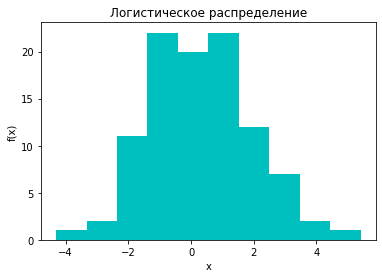

In [12]:
plt.hist(logistic, color = 'c')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Логистическое распределение')
plt.show()

### Задание 13

##### Графики функий f(x) и g(x)

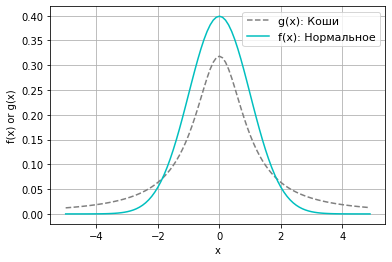

In [13]:
import numpy as np

def g(x):
    return 1/(math.pi*(1+x**2))
def f(x):
    return 1/((2*math.pi)**(0.5))*math.exp(-(x**2)/2)

lag = 0.1
xlist = np.arange(-5.0, 5.0, lag)
ylist1 = [g(x) for x in xlist]
ylist2 = [f(x) for x in xlist]

plt.plot(xlist, ylist1, color='grey', linestyle='--')
plt.plot(xlist, ylist2,color='c')

plt.xlabel('x')
plt.ylabel('f(x) or g(x)')
plt.legend(('g(x): Коши', 'f(x): Нормальное'),loc='upper right', fontsize=11)
plt.grid(True)
plt.show()

##### 1) Метод выборки с отклонением для нормального распределения

##### 1.1) Поиск значения величины 'с'

Плотность распределения Коши:

$\begin{array}\mathcal{g}\left(x\right)&=&\displaystyle \frac{1}{\pi (1 + x^{2})} \end{array}$

Плотность стандартного нормального распределения:

$\begin{array}\mathcal{ f}\left(x\right)&=&\displaystyle \frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}} \end{array}$

Для того, чтобы найти значения константы 'c' необходимо найти максимум следующей функции:

$\begin{array}\mathcal\displaystyle\frac{{f}\left(x\right)}{{g}\left(x\right)}&=&\displaystyle \sqrt{\frac{\pi}{2}}e^{\frac{-x^2}{2}}(1 + x^{2}) \end{array}$

Найдем производную данной функции:

$\begin{array}\mathcal\displaystyle(\frac{{f}\left(x\right)}{{g}\left(x\right)})'&=&\displaystyle \sqrt{\frac{\pi}{2}} x e^{\frac{-x^2}{2}}(1 - x)(1+x) \end{array}$

Приравняем полученную производную к нулю и найдем глобальный максимум функции:

$\begin{array}\mathcal\displaystyle(\frac{{f}\left(x\right)}{{g}\left(x\right)})'&=&\displaystyle 0 \end{array}$

Глобальный максимум 1.52 достигается при x1 = -1 и x2 = 1. 

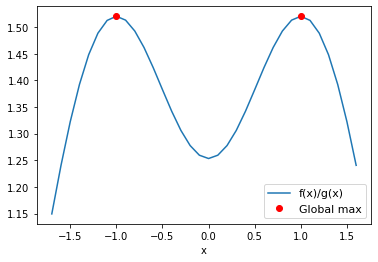

In [14]:
def f_div_g(x):
    return (math.pi/2)**(0.5)*math.exp(-(x**2)/2)*(1+x**2)

lagС = 0.1
xlistС = np.arange(-1.7, 1.7, lag)

ylistC = [f_div_g(x) for x in xlistС]
plt.plot(xlistС, ylistC)
plt.plot([-1,1], [f_div_g(-1),f_div_g(-1)], 'ro')

plt.xlabel('x')
plt.legend(('f(x)/g(x)', 'Global max'), fontsize=11)

plt.show()

In [15]:
c1 = (2*math.pi/math.exp(1))**(0.5)
c1

1.520346901066281

##### 1.2) Графики функий f(x) и с*g(x)

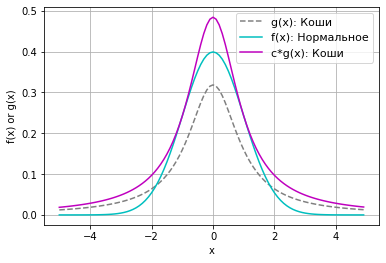

In [16]:
def cg(x):
    return 1/(math.pi*(1+x**2))*c1

ylist3 = [cg(x) for x in xlist]
plt.plot(xlist, ylist1, color='grey', linestyle='--')
plt.plot(xlist, ylist2,color='c')
plt.plot(xlist, ylist3,color='m')

plt.xlabel('x')
plt.ylabel('f(x) or g(x)')
plt.legend(('g(x): Коши', 'f(x): Нормальное','c*g(x): Коши'),loc='upper right', fontsize=11)
plt.grid(True)
plt.show()

##### 1.3) Генерирование стандартных нормальных случайных величин

In [17]:
n = 50
X_norm1 = []

# Шаг 1
U = Uniform_dist(n)

# Шаг 2
Y = Cauchy_dist(n)

# Шаг 2
for i in range(n):
    if U[i]*cg(Y[i]) <= f(Y[i]):
        X_norm1.append(Y[i])

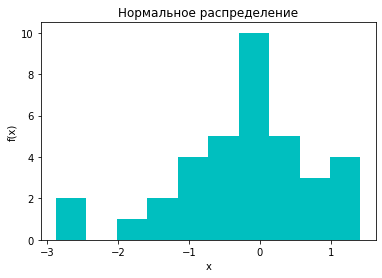

In [18]:
plt.hist(X_norm1, color = 'c')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Нормальное распределение')
plt.show()

##### 2) Метод выборки с отклонением для распределения Коши

##### 2.1) Поиск значения величины 'с'

Плотность распределения Коши:

$\begin{array}\mathcal{g}\left(x\right)&=&\displaystyle \frac{1}{\pi (1 + x^{2})} \end{array}$

Плотность стандартного нормального распределения:

$\begin{array}\mathcal{ f}\left(x\right)&=&\displaystyle \frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}} \end{array}$

Для того, чтобы найти значения константы 'c' необходимо найти максимум следующей функции:

$\begin{array}\mathcal\displaystyle\frac{{g}\left(x\right)}{{f}\left(x\right)}&=&\displaystyle \sqrt\frac{2}{\pi}\frac{e^{\frac{x^2}{2}}}{(1 + x^{2})} \end{array}$

Найдем производную данной функции:

$\begin{array}\mathcal\displaystyle(\frac{{g}\left(x\right)}{{f}\left(x\right)})'&=&\displaystyle \sqrt{\frac{2}{\pi}} \frac{x e^{\frac{x^2}{2}}(x - 1)(x + 1)}{(1+x^2)^2} \end{array}$

Приравняем полученную производную к нулю и найдем глобальный максимум функции:

$\begin{array}\mathcal\displaystyle(\frac{{g}\left(x\right)}{{f}\left(x\right)})'&=&\displaystyle 0 \end{array}$

Глобальный максимум у данной функции не существует, то есть нельзя найти такое значение параметра 'c', при котором выполнялось условие алгоритма выборки с отклонением, поэтому использование нормального распределения как вспомогательного является невозможным.

##### (Проверка для локального максимума)

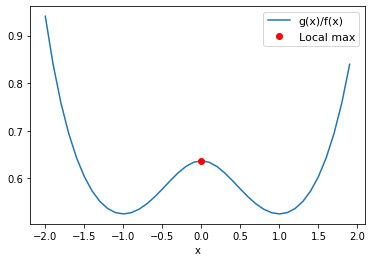

In [19]:
def g_div_f(x):
    return (2/math.pi)*math.exp((x**2)/2)/(1+x**2)

lagС2 = 0.1
xlistС2 = np.arange(-2, 2, lag)

ylistC2 = [g_div_f(x) for x in xlistС2]
plt.plot(xlistС2, ylistC2)
plt.plot([0], g_div_f(0), 'ro')

plt.xlabel('x')
plt.legend(('g(x)/f(x)', 'Local max'), fontsize=11)

plt.show()

In [20]:
c2 = (2/math.pi)**(0.5)
c2

0.7978845608028654

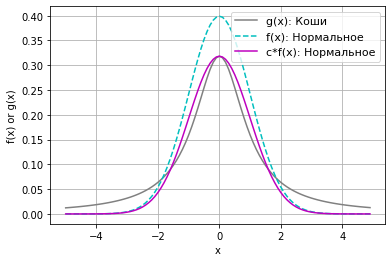

In [21]:
def cf(x):
    return 1/((2*math.pi)**(0.5))*math.exp(-(x**2)/2)*c2

ylist4 = [cf(x) for x in xlist]
plt.plot(xlist, ylist1, color='grey')
plt.plot(xlist, ylist2,color='c', linestyle='--')
plt.plot(xlist, ylist4,color='m')

plt.xlabel('x')
plt.ylabel('f(x) or g(x)')
plt.legend(('g(x): Коши', 'f(x): Нормальное','c*f(x): Нормальное'),loc='upper right', fontsize=11)
plt.grid(True)
plt.show()

Вывод: использование нормального распределения как вспомогательного является невозможным.

### Задание 14

##### 1)  λ = 1

Плотность экспоненциальногораспределения:

$\begin{array}\mathcal{g}\left(x\right)&=&\displaystyle e^{-x} \end{array}$

Плотность стандартного нормального распределения:

$\begin{array}\mathcal{ p}\left(x\right)&=&\displaystyle \frac{1}{\sqrt{2\pi}}e^{\frac{-x^2}{2}} \end{array}$

Рассмотрим:

$\begin{array}\mathcal{ f}\left(x\right)&=&\displaystyle \frac{2}{\sqrt{2\pi}}e^{\frac{-x^2}{2}} \end{array}$

Для того, чтобы найти значения константы c необходимо найти максимум следующей функции:

$\begin{array}\mathcal\displaystyle\frac{{f}\left(x\right)}{{g}\left(x\right)}&=&\displaystyle \sqrt\frac{2e}{\pi}e^{\frac{-(x - 1)^2}{2}} \end{array}$

Найдем производную данной функции:

$\begin{array}\mathcal\displaystyle(\frac{{f}\left(x\right)}{{g}\left(x\right)})'&=&\displaystyle \sqrt\frac{2e}{\pi}e^{\frac{-(x - 1)^2}{2}}(1-x) \end{array}$

Приравняем полученную производную к нулю и найдем глобальный максимум функции:


$\begin{array}\mathcal\displaystyle(\frac{{f}\left(x\right)}{{g}\left(x\right)})'&=&\displaystyle 0 \end{array}$

Глобальный максимум 1.32 достигается при x = 1. 

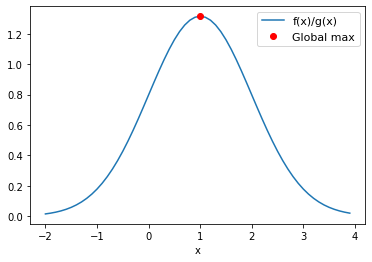

In [22]:
def f_div_g2(x):
    return (2*math.exp(1)/math.pi)**(0.5)*math.exp(-(x-1)**2/2)

lagС3 = 0.1
xlistС3 = np.arange(-2, 4, lag)

ylistC3 = [f_div_g2(x) for x in xlistС3]
plt.plot(xlistС3, ylistC3)
plt.plot([1], f_div_g2(1), 'ro')

plt.xlabel('x')
plt.legend(('f(x)/g(x)', 'Global max'), fontsize=11)

plt.show()

In [23]:
c3 = (2 * math.exp(1)/math.pi)**(0.5)
c3

1.315489246958914

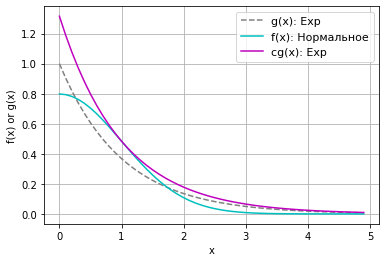

In [24]:
import numpy as np

def g1(x):
    return math.exp(-x)
def f1(x):
    return 2/((2*math.pi)**(0.5))*math.exp(-(x**2)/2)
def cg1(x):
    return math.exp(-x)*c3


lag = 0.1
x_list = np.arange(0, 5.0, lag)
ylist_1 = [g1(x) for x in x_list]
ylist_2 = [f1(x) for x in x_list]
ylist_3 = [cg1(x) for x in x_list]

plt.plot(x_list, ylist_1, color='grey', linestyle='--')
plt.plot(x_list, ylist_2,color='c')
plt.plot(x_list, ylist_3,color='m')

plt.xlabel('x')
plt.ylabel('f(x) or g(x)')
plt.legend(('g(x): Exp', 'f(x): Нормальное','cg(x): Exp'),loc='upper right', fontsize=11)
plt.grid(True)
plt.show()

Плотность экспоненциального распределения: 

$\begin{array}\mathcal{ f}\left(x\right)&=&\displaystyle \lambda e^{{-\lambda x}} \end{array}$

Функция экспоненциального распределения: 

$\begin{array}\mathcal{F}\left(x\right)&=&\displaystyle \int \limits _{-\infty }^{x}\ \lambda e^{{-\lambda x}} { dx}&=& \displaystyle 1 - e^{{-\lambda x}} \end{array}$

Обратная функция экспоненциального распределения для генерирования случайных величин:

$\begin{array}\mathcal{ F^{-1}}\left(x\right)&=&\displaystyle - \frac{1}{\lambda} ln (1-x) \end{array}$


In [25]:
def Exp_dist(N, lam = 1):
    X = []
    for i in Uniform_dist(N):
        X.append(-1/lam*math.log(1-i))
    return X

In [26]:
n = 1400
X_norm2 = []
X_norm3 = []

# Шаг 1
U = Uniform_dist(n)

# Шаг 2
Y = Exp_dist(n)

# Шаг 2
for i in range(n):
    if U[i]*cg1(Y[i]) <= f1(Y[i]):
            X_norm2.append(Y[i])
            
Ui = Uniform_dist(n)
for i in range(1000):
    if Ui[i] <= 0.5:
        X_norm3.append(X_norm2[i])
    else:
        X_norm3.append(-X_norm2[i])
len(X_norm3)

1000

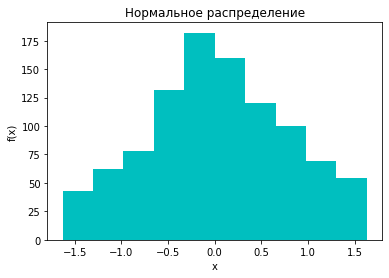

In [27]:
plt.hist(X_norm3, color = 'c')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Нормальное распределение')
plt.show()

##### 2)  λ ≠ 1

$\begin{array}\mathcal{ g}\left(x\right)&=&\displaystyle \lambda e^{{-\lambda x}} \end{array}$

$\begin{array}\mathcal{ f}\left(x\right)&=&\displaystyle \frac{2}{\sqrt{2\pi}}e^{\frac{-x^2}{2}} \end{array}$

$\begin{array}\mathcal\displaystyle\frac{{f}\left(x\right)}{{g}\left(x\right)}&=&\displaystyle \sqrt\frac{2}{\pi}\frac{e^{\frac{-{x^2}}{2}+\lambda x}}{\lambda}&=&\displaystyle \sqrt\frac{2}{\pi}\frac{e^{-{\frac{1}{2}(x^2-2\lambda x +\lambda ^2)+\frac{\lambda ^2}{2}}}}{\lambda}&=&\displaystyle \sqrt\frac{2}{\pi}\frac{1}{\lambda}e^{\frac{\lambda ^2} {2}}e^{-\frac{(x - \lambda)^2} {2}} \end{array}$


$\begin{array}\mathcal\displaystyle(\frac{{f}\left(x\right)}{{g}\left(x\right)})'&=&\displaystyle \sqrt\frac{2}{\pi}\frac{1}{\lambda}e^{\frac{\lambda ^2} {2}}e^{-\frac{(x - \lambda)^2} {2}} (\lambda-x) \end{array}$ 

При x = λ достигается максимум данной функции. Значит,

$\begin{array}\mathcal\displaystyle c(\lambda) &=&\displaystyle \sqrt\frac{2}{\pi}\frac{1}{\lambda}e^{\frac{\lambda ^2} {2}} \end{array}$

Для того, чтобы эффективность алгоритма была максимальна:

$\displaystyle P(успех) = \displaystyle \frac{1}{c}$, при $\displaystyle c(\lambda) = \displaystyle \sqrt\frac{2}{\pi}\frac{1}{\lambda}e^{\frac{\lambda ^2} {2}}$

необхобимо найти минимально возможное значение c.

Так как c(λ) является функцией от λ, найдем значение λ, при котором функция достигает своего минимума:

$\begin{array}\mathcal\displaystyle c'(\lambda) &=&\displaystyle \sqrt\frac{2}{\pi}(-\frac{1}{\lambda ^2}e^{\frac{\lambda ^2} {2}} + \frac{1}{\lambda} \lambda e^{\frac{\lambda ^2} {2}} )&=&\displaystyle \sqrt\frac{2}{\pi}e^{\frac{\lambda ^2} {2}}(1 -\frac{1}{\lambda ^2} ) \end{array}$

при λ = 1 достигается минимум данной функции.

ч. и т.д.

### Задание 17

**Предпосылки:**

$ W =\displaystyle \frac{K}{N} = \displaystyle p_{0} $ - часть опрераций, проходящих с осложнениями. 

Эту величину также можно трактовать как вероятность того, что случайно выбранная опрерация из генеральной совокупности пройдет с осложнениями:

$p_{0} = 0.1 $

$ n$  – число опрераций с использованием новых разработок; $ k$ – число опрераций с использованием новых разработок, прошедших с осложнениями.

$ n = 142 $

$ k = 9 $

$ w =\displaystyle \frac{k}{n} = \displaystyle p $ - точечная оценка вероятности в биномиальном законе распределения, т.е. вероятность того, что случайно выбранная операция из проведенных операций с использованием новых разработок пройдет с осложнениями.

$ p =\displaystyle \frac{9}{142} ≈ 0.063 $

**Постановка задачи:**

* $\displaystyle H_{0}: p = 0.1 $  

*разработки лаборатории не снижают ранее известный риск;*

* $\displaystyle H_{1}: p < 0.1 $  

*разработки лаборатории позволяют снизить ранее известный риск.*

Пусть уровень значимости $ \alpha $  равен 0.05.

**Решение задачи:**

Для решения задачи используем критерий, который при справедливости основной гипотезы имеет приближенно стандартное нормальное распределение:

* $\displaystyle t = \displaystyle \frac{w - p_{0}}{\displaystyle \sqrt {\frac {p_{0}(1 - p_{0})}{n}}} $

Тогда,

* $\displaystyle t_{факт} = \displaystyle \frac{0.063 - 0.1}{\displaystyle \sqrt {\frac {0.1 * 0.9}{142}}} ≈ -1.47 $

$ P(t_{кр} < t < +\infty) = 0.95 $

$ P(t_{кр} < t < +\infty) = \Phi_{0} (+\infty) - \Phi_{0} (t_{кр}) = 0.5 - \Phi_{0} (t_{кр}) = 0.95 $

$\Phi_{0} (t_{кр}) = -0.45$

$\Phi_{0} (-t_{кр}) = 0.45$

$t_{кр} = -1.65$

$ |t_{факт}| < |t_{кр}|$

**Вывод:**

С вероятностью 0.95 нет оснований отвергнуть нулевую гипотезу о том, что разработки лаборатории не снижают ранее известный риск.

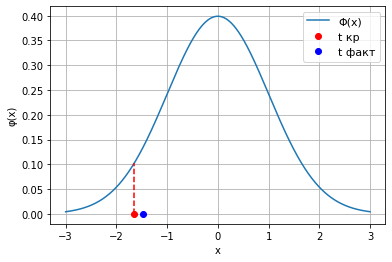

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.arange(-3,3,0.001)
y = norm.pdf(x, 0, 1)
plt.plot(x, y)
plt.plot([-1.65], [0], 'ro')
plt.plot([-1.47], [0], 'bo')
plt.plot([-1.65]*5,[0, 0.025, 0.05, 0.075, norm.pdf(-1.65, 0, 1)],linestyle='--', color ='r')
plt.xlabel('x')
plt.ylabel('φ(x)')
plt.legend(('Φ(x)', 't кр','t факт'),loc='upper right', fontsize=11)
plt.grid(True)
plt.show()